In [1]:
import pandas as pd
import numpy as np
import FlowCal
#import sys
from numpy import NaN
from scipy import stats
import statistics
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
#from sklearn.cluster import KMeans
from scipy import signal
from scipy import linalg
from sklearn.decomposition import FastICA, PCA
#from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import plot_confusion_matrix
#from sklearn.ensemble import BaggingClassifier
import re


#%matplotlib inline  
#%matplotlib notebook
#%pylab

In [2]:
# reading list of drugs
ABs = pd.read_excel('cytof_antibodies.xls',index_col=0)
for iso_name in ABs.index:
    ABs.loc[iso_name,'channel']='(' + iso_name + ')Di'

ABs

,Target,Clone,Clone Reactivity,Clone Applications,Manufacturer,Lot,Description and Clone Validation (Manufacturer),Staining Concentration [µg/ml],User Clone Validation (Py2T by Mass Cytometry),channel
Isotope,,,,,,,,,,
La139,Purified Mouse Anti-CREB (pS133) / ATF-1 (pS63),J151-21,"Human, Mouse, Rat (predicted)","WB, FC",BD,558359,https://www.bdbiosciences.com/us/reagents/rese...,2.000,"Py2T, MEK1/2 signaling perturbation",(La139)Di
Pr141,pStat5 (pTyr694),47,Mouse; Human,"WB, FC",BD,2150654,https://www.bdbiosciences.com/us/applications/...,4.900,"30 min vanadate treatment, 125µM vs 30 min Un...",(Pr141)Di
Nd142,pSHP2 (pTyr580),D66F10,Human; Mouse; Rat,"WB, IP, FC",CST,2,https://www.cellsignal.com/products/primary-an...,4.000,18 h TPA vs Untreated,(Nd142)Di
Nd143,pFAK (pTyr397),poly7,Human; Mouse,WB,CST,5,https://www.cellsignal.com/products/primary-an...,2.500,5 Days 4 ng/mL TGFb vs 5 Days Untreated,(Nd143)Di
Nd144,MEK1/2 (pSer221),166F8,Human; Mouse,"WB, IHC, FC",CST,13,https://www.cellsignal.com/products/primary-an...,4.000,"30 min 4 ng/mL TGFb + Dabrafenib, AZ628 (bRaf,...",(Nd144)Di
Nd145,Twist,poly ABD29,Mouse; Human,"IH(P), ICC",Millipore,ABD29,http://www.merckmillipore.com/NL/en/product/An...,4.000,3 Days 4 ng/mL TGFb vs 3 Days Untreated,(Nd145)Di
Sm147,c-myc,D84C12,Human; Mouse,"WB, IF, FC",CST,7,https://www.cellsignal.com/products/primary-an...,6.000,18 h TPA vs Untreated,(Sm147)Di
Nd148,Snail,ab180714,Human; Mouse,"IHC-Fr, WB, ICC/IF, IHC-P",Abcam,AF3639,https://www.abcam.com/snail-slug-antibody-ab18...,5.000,3 Days 4 ng/mL TGFb vs 3 Days Untreated,(Nd148)Di
Sm149,Nanog,D2A3,Mouse,"WB, IP, FC, IF, ChiP",BD,2,https://www.cellsignal.com/products/primary-an...,3.000,Not validated by user,(Sm149)Di


In [3]:
drugs = pd.read_excel('cytof_drugs.xls',index_col=0)
drugs

,Cas Number,Reported Target,Catalog Number,Plate / Well
Compound in DMSO,,,,
Axitinib,319460-85-0,"VEGFR, PDGFR, c-Kit",S1005,A / B2
Dovitinib (TKI-258),"405169-16-6, 804551-71-1",FLT3,S1018,A / B3
Lapatinib Ditosylate (Tykerb),"388082-77-7, 231277-92-2 (free base), 1187538-...","EGFR, HER2",S1028,A / B4
Sorafenib (Nexavar),"475207-59-1, 284461-73-0 (free base)","VEGFR, PDGFR, Raf",S1040,A / B5
BMS-599626 (AC480),"714971-09-2, 873837-23-1 (HCl), 873837-22-0 (H2O)","EGFR, HER2",S1056,A / B6
...,...,...,...,...
AEE788 (NVP-AEE788),497839-62-0,"EGFR, Flt, VEGFR, HER2",S1486,E / G7
Quizartinib (AC220),950769-58-1,Flt,S1526,E / G8
PHT-427,1191951-57-1,Akt,S1556,E / G9


In [4]:
Channels = pd.read_excel('Channels_names.xlsx',index_col=0)
channels_list = list(Channels['Channel Short Name'])

In [5]:
# loading names of datasets
annot_A = pd.read_csv('./PhEMD-Multi-batch analyses-Inhibitor Dataset A/experiment_83976_annotations.tsv',index_col=0,sep='\t')
annot_B = pd.read_csv('./PhEMD-Multi-batch analyses-Inhibitor Dataset B/experiment_83977_annotations.tsv',index_col=0,sep='\t')
annot_C = pd.read_csv('./PhEMD-Multi-batch analyses-Inhibitor Dataset C/experiment_83978_annotations.tsv',index_col=0,sep='\t')
annot_D = pd.read_csv('./PhEMD-Multi-batch analyses-Inhibitor Dataset D/experiment_83979_annotations.tsv',index_col=0,sep='\t')
annot_E1= pd.read_csv('./PhEMD-Multi-batch analyses-Inhibitor Dataset E/experiment_83981_annotations.tsv',index_col=0,sep='\t')
annot_E2= pd.read_csv('./PhEMD-E inhibitor dataset - Replicate 2/experiment_83989_annotations.tsv',index_col=0,sep='\t')
annot_E3= pd.read_csv('./PhEMD-E inhibitor dataset - Replicate 3/experiment_83990_annotations.tsv',index_col=0,sep='\t')

controls_MES_A = list(annot_A.filter(regex='TGFb_[A-Z]\d+_Singlets_[A-Z]\d+',axis=0).index)
controls_EPI_A = list(annot_A.filter(regex='Untreated_[A-Z]\d+_Singlets_[A-Z]\d+',axis=0).index)
treatments_A = list(set(annot_A.index).difference(controls_EPI_A).difference(controls_MES_A))

controls_MES_B = list(annot_B.filter(regex='TGFb_[A-Z]\d+_Singlets_[A-Z]\d+',axis=0).index)
controls_EPI_B = list(annot_B.filter(regex='Untreated_[A-Z]\d+_Singlets_[A-Z]\d+',axis=0).index)
treatments_B = list(set(annot_B.index).difference(controls_EPI_B).difference(controls_MES_B))

controls_MES_C = list(annot_C.filter(regex='TGFb_[A-Z]\d+_Singlets_[A-Z]\d+',axis=0).index)
controls_EPI_C = list(annot_C.filter(regex='Untreated_[A-Z]\d+_Singlets_[A-Z]\d+',axis=0).index)
treatments_C = list(set(annot_C.index).difference(controls_EPI_C).difference(controls_MES_C))

controls_MES_D = list(annot_D.filter(regex='TGFb_[A-Z]\d+_Singlets_[A-Z]\d+',axis=0).index)
controls_EPI_D = list(annot_D.filter(regex='Untreated_[A-Z]\d+_Singlets_[A-Z]\d+',axis=0).index)
treatments_D = list(set(annot_D.index).difference(controls_EPI_D).difference(controls_MES_D))

controls_MES_E1= list(annot_E1.filter(regex='TGFb_[A-Z]\d+_Singlets_[A-Z]\d+',axis=0).index)
controls_EPI_E1= list(annot_E1.filter(regex='Untreated_[A-Z]\d+_Singlets_[A-Z]\d+',axis=0).index)
treatments_E1= list(set(annot_E1.index).difference(controls_EPI_E1).difference(controls_MES_E1))

controls_MES_E2= list(annot_E2.filter(regex='TGFb_[A-Z]\d+\.fcs',axis=0).index)
controls_EPI_E2= list(annot_E2.filter(regex='Untreated_[A-Z]\d+\.fcs',axis=0).index)
treatments_E2= list(set(annot_E2.index).difference(controls_EPI_E2).difference(controls_MES_E2))

controls_MES_E3= list(annot_E3.filter(regex='TGFb_[A-Z]\d+\.fcs',axis=0).index)
controls_EPI_E3= list(annot_E3.filter(regex='Untreated_[A-Z]\d+\.fcs',axis=0).index)
treatments_E3= list(set(annot_E3.index).difference(controls_EPI_E3).difference(controls_MES_E3))

In [6]:
# reading controls, working with averages

# reading epithelial controls from dataset A
arr_fcs = []
for filename in controls_EPI_A:
    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset A/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels).mean(axis=0)
    arr_fcs.append(df_fcs)
controls_EPI_fcs_A = pd.DataFrame(arr_fcs,columns=np_fcs.channels)
controls_EPI_FC_A = controls_EPI_fcs_A.divide(controls_EPI_fcs_A.mean(axis=0))
controls_EPI_FC_A = controls_EPI_FC_A[ABs['channel']]
#controls_EPI_FC_A

# reading mesenchymal controls from dataset A
arr_fcs = []
for filename in controls_MES_A:
    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset A/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels).mean(axis=0)
    arr_fcs.append(df_fcs)
controls_MES_fcs_A = pd.DataFrame(arr_fcs,columns=np_fcs.channels)
controls_MES_FC_A = controls_MES_fcs_A.divide(controls_EPI_fcs_A.mean(axis=0))
controls_MES_FC_A = controls_MES_FC_A[ABs['channel']]
#controls_MES_FC_A

# reading epithelial controls from dataset B
arr_fcs = []
for filename in controls_EPI_B:
    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset B/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels).mean(axis=0)
    arr_fcs.append(df_fcs)
controls_EPI_fcs_B = pd.DataFrame(arr_fcs,columns=np_fcs.channels)
controls_EPI_FC_B = controls_EPI_fcs_B.divide(controls_EPI_fcs_B.mean(axis=0))
controls_EPI_FC_B = controls_EPI_FC_B[ABs['channel']]
#controls_EPI_FC_B

# reading mesenchymal controls from dataset B
arr_fcs = []
for filename in controls_MES_B:
    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset B/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels).mean(axis=0)
    arr_fcs.append(df_fcs)
controls_MES_fcs_B = pd.DataFrame(arr_fcs,columns=np_fcs.channels)
controls_MES_FC_B = controls_MES_fcs_B.divide(controls_EPI_fcs_B.mean(axis=0))
controls_MES_FC_B = controls_MES_FC_B[ABs['channel']]
#controls_MES_FC_B

# reading epithelial controls from dataset C
arr_fcs = []
for filename in controls_EPI_C:
    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset C/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels).mean(axis=0)
    arr_fcs.append(df_fcs)
controls_EPI_fcs_C = pd.DataFrame(arr_fcs,columns=np_fcs.channels)
controls_EPI_FC_C = controls_EPI_fcs_C.divide(controls_EPI_fcs_C.mean(axis=0))
controls_EPI_FC_C = controls_EPI_FC_C[ABs['channel']]
#controls_EPI_FC_C

# reading mesenchymal controls from dataset C
arr_fcs = []
for filename in controls_MES_C:
    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset C/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels).mean(axis=0)
    arr_fcs.append(df_fcs)
controls_MES_fcs_C = pd.DataFrame(arr_fcs,columns=np_fcs.channels)
controls_MES_FC_C = controls_MES_fcs_C.divide(controls_EPI_fcs_C.mean(axis=0))
controls_MES_FC_C = controls_MES_FC_C[ABs['channel']]
#controls_MES_FC_C

# reading epithelial controls from dataset D
arr_fcs = []
for filename in controls_EPI_D:
    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset D/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels).mean(axis=0)
    arr_fcs.append(df_fcs)
controls_EPI_fcs_D = pd.DataFrame(arr_fcs,columns=np_fcs.channels)
controls_EPI_FC_D = controls_EPI_fcs_D.divide(controls_EPI_fcs_D.mean(axis=0))
controls_EPI_FC_D = controls_EPI_FC_D[ABs['channel']]
#controls_EPI_FC_D

# reading mesenchymal controls from dataset D
arr_fcs = []
for filename in controls_MES_D:
    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset D/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels).mean(axis=0)
    arr_fcs.append(df_fcs)
controls_MES_fcs_D = pd.DataFrame(arr_fcs,columns=np_fcs.channels)
controls_MES_FC_D = controls_MES_fcs_D.divide(controls_EPI_fcs_D.mean(axis=0))
controls_MES_FC_D = controls_MES_FC_D[ABs['channel']]
#controls_MES_FC_D

# reading epithelial controls from dataset E1
arr_fcs = []
for filename in controls_EPI_E1:
    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset E/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels).mean(axis=0)
    arr_fcs.append(df_fcs)
controls_EPI_fcs_E1 = pd.DataFrame(arr_fcs,columns=np_fcs.channels)
controls_EPI_FC_E1 = controls_EPI_fcs_E1.divide(controls_EPI_fcs_E1.mean(axis=0))
controls_EPI_FC_E1 = controls_EPI_FC_E1[ABs['channel']]
#controls_EPI_FC_E1

# reading mesenchymal controls from dataset E1
arr_fcs = []
for filename in controls_MES_E1:
    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset E/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels).mean(axis=0)
    arr_fcs.append(df_fcs)
controls_MES_fcs_E1 = pd.DataFrame(arr_fcs,columns=np_fcs.channels)
controls_MES_FC_E1 = controls_MES_fcs_E1.divide(controls_EPI_fcs_E1.mean(axis=0))
controls_MES_FC_E1 = controls_MES_FC_E1[ABs['channel']]
#controls_MES_FC_E1

# reading epithelial controls from dataset E2
arr_fcs = []
for filename in controls_EPI_E2:
    np_fcs = FlowCal.io.FCSData('./PhEMD-E inhibitor dataset - Replicate 2/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels).mean(axis=0)
    arr_fcs.append(df_fcs)
controls_EPI_fcs_E2 = pd.DataFrame(arr_fcs,columns=np_fcs.channels)
controls_EPI_FC_E2 = controls_EPI_fcs_E2.divide(controls_EPI_fcs_E2.mean(axis=0))
controls_EPI_FC_E2 = controls_EPI_FC_E2[ABs['channel']]
#controls_EPI_FC_E2

# reading mesenchymal controls from dataset E2
arr_fcs = []
for filename in controls_MES_E2:
    np_fcs = FlowCal.io.FCSData('./PhEMD-E inhibitor dataset - Replicate 2/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels).mean(axis=0)
    arr_fcs.append(df_fcs)
controls_MES_fcs_E2 = pd.DataFrame(arr_fcs,columns=np_fcs.channels)
controls_MES_FC_E2 = controls_MES_fcs_E2.divide(controls_EPI_fcs_E2.mean(axis=0))
controls_MES_FC_E2 = controls_MES_FC_E2[ABs['channel']]

# reading epithelial controls from dataset E3
arr_fcs = []
for filename in controls_EPI_E3:
    np_fcs = FlowCal.io.FCSData('./PhEMD-E inhibitor dataset - Replicate 3/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels).mean(axis=0)
    arr_fcs.append(df_fcs)
controls_EPI_fcs_E3 = pd.DataFrame(arr_fcs,columns=np_fcs.channels)
controls_EPI_FC_E3 = controls_EPI_fcs_E3.divide(controls_EPI_fcs_E3.mean(axis=0))
controls_EPI_FC_E3 = controls_EPI_FC_E3[ABs['channel']]
#controls_EPI_FC_E3

# reading mesenchymal controls from dataset E3
arr_fcs = []
for filename in controls_MES_E3:
    np_fcs = FlowCal.io.FCSData('./PhEMD-E inhibitor dataset - Replicate 3/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels).mean(axis=0)
    arr_fcs.append(df_fcs)
controls_MES_fcs_E3 = pd.DataFrame(arr_fcs,columns=np_fcs.channels)
controls_MES_FC_E3 = controls_MES_fcs_E3.divide(controls_EPI_fcs_E3.mean(axis=0))
controls_MES_FC_E3 = controls_MES_FC_E3[ABs['channel']]
#controls_MES_FC_E3


In [7]:
# collating controls
total_EPI_controls = pd.concat([controls_EPI_FC_A,controls_EPI_FC_B,controls_EPI_FC_C,controls_EPI_FC_D,controls_EPI_FC_E1,controls_EPI_FC_E2,controls_EPI_FC_E3],axis=0,ignore_index=True)
EPI_cnt = total_EPI_controls.mean(axis=0)
total_MES_controls = pd.concat([controls_MES_FC_A,controls_MES_FC_B,controls_MES_FC_C,controls_MES_FC_D,controls_MES_FC_E1,controls_MES_FC_E2,controls_MES_FC_E3],axis=0,ignore_index=True)
MES_cnt = total_MES_controls.mean(axis=0)
#total_EPI_controls

In [8]:
# preparing data for STV calculation
trainset = pd.concat([total_EPI_controls,total_MES_controls],axis=0,ignore_index=True)
cls = list(np.full(len(total_EPI_controls),1)) + list(np.full(len(total_MES_controls),0))

# checking whether antibody indexes coincide
chck = True
for idx in range(len(trainset.columns)):
    if not (ABs.index[idx] in trainset.columns[idx]):
        chck = False
chck

True

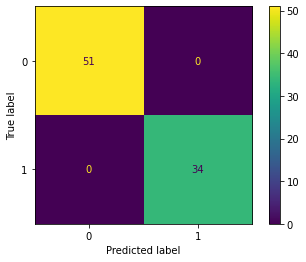

In [9]:
# building STV, using average values
svc = SVC(kernel='linear')
svc.fit(trainset,cls)
plot_confusion_matrix(svc,trainset,cls)

In [10]:
# saving STV results
b_coeff = svc.intercept_[0]/linalg.norm(svc.coef_[0])
norm_vec = - svc.coef_[0]/linalg.norm(svc.coef_[0])
s_vec = (MES_cnt - EPI_cnt)/linalg.norm(MES_cnt - EPI_cnt)

norm_vec_df = pd.DataFrame(list(s_vec),index=ABs['Target'],columns=['s_vec'])
norm_vec_df.insert(0,'norm_vec',norm_vec)
# plot STV ranking
norm_vec_df.to_csv('STV_EMT_Bodenmiller.csv')
norm_vec_df.sort_values(by='norm_vec')

# miuns is epithelial state
# plus is mesenchymal state

,norm_vec,s_vec
Target,,
CD24,-0.059436,-0.044166
E-Cadherin,-0.051843,-0.037688
ß-Catenin,-0.047228,-0.034940
pSTAT3 (pThr727),-0.042391,-0.017497
pMARCK (pSer167/Ser170),-0.041207,-0.027762
pSmad2/3 (pSmad2(pSer465/Ser467)/pSmad3(pSer423/Ser425),-0.025616,-0.015467
pS6 p(pSer235/Ser236),-0.022247,0.041387
pErk1/2 (pThr202/pTyr204),-0.018558,0.000454
NFkB (p65),-0.013625,-0.003053


In [11]:
np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
# vectors are nearly colinear

0.9785532881094201

In [12]:
# checking DPD values for controls
DPDs_EPI = []
for smpl in total_EPI_controls.index:
    DPD_val = -(b_coeff - np.dot(total_EPI_controls.iloc[smpl],norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
    DPDs_EPI.append(DPD_val)
print("DPD values for epithelial controls")
print(DPDs_EPI)
DPD_EPI_av = statistics.mean(DPDs_EPI)
print("Average DPD for epithelial state is:")
print(DPD_EPI_av)

print('\n')

DPDs_MES = []
for smpl in total_MES_controls.index:
    DPD_val = -(b_coeff - np.dot(total_MES_controls.iloc[smpl],norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
    DPDs_MES.append(DPD_val)
print("DPD values for mesenchymal controls")
print(DPDs_MES)
DPD_MES_av = statistics.mean(DPDs_MES)
print("Average DPD for mesenchymal state is:")
print(DPD_MES_av)


DPD values for epithelial controls
[-8.434167657079666, -8.322381586980491, -8.410668937026431, -7.921074638835384, -7.370693425343315, -8.038674911569997, -8.13519850383894, -7.935742084897168, -8.236661158486228, -8.112709330357331, -8.07830578602072, -7.921381072478637, -8.326046537877108, -8.258172192394657, -7.875080380683279, -8.173880430402484, -8.193615129568771, -8.42853372556115, -8.287086078598596, -7.375870435355529, -7.606010576769377, -8.237560091834764, -8.342257810635944, -8.013219796093072, -8.259938164549856, -8.177566311492004, -8.231460737150003, -8.32118811396436, -7.636851455810426, -8.091919391368181, -7.890975331876951, -8.260093651684645, -7.886611561890915, -8.329508214022795]
Average DPD for epithelial state is:
-8.09179721213233


DPD values for mesenchymal controls
[10.016282453250103, 7.558757708619068, 9.122880991240516, 7.4333297283511435, 7.374144442664942, 9.616125886413434, 15.580908573904944, 20.151115917650845, 11.96338434672742, 11.010756614314484,

In [13]:
# now we have to check how inhibitors change DPDs
drugs['DPD_value']=np.nan
drugs['DPD_change']=np.nan
drugs['DPD_norm']=np.nan
location_regex = re.compile(r'([A-Z]) / ([A-Z]\d+)')
well_regex = re.compile(r'([A-Z]\d+)\.fcs')

for drug_name in drugs.index:
    # now we need to find appropriate file
    srch = location_regex.search(drugs.loc[drug_name,'Plate / Well'])
    if srch:
        if (srch.group(1) == "A"):
            # processing 1 replicate for A
            DPD_EPI = - (b_coeff - np.dot(controls_EPI_FC_A.mean(axis=0),norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
            DPD_MES = - (b_coeff - np.dot(controls_MES_FC_A.mean(axis=0),norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
            for fcs_name in treatments_A:
                # extracting well number
                well_srch = well_regex.search(fcs_name)
                if not well_srch:
                    print('Wrong file name format!')
                if (well_srch.group(1) == srch.group(2)):
                    # we have found our file
                    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset A/'+fcs_name)
                    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels)
                    df_FC = df_fcs.divide(controls_EPI_fcs_A.mean(axis=0))
                    df_FC = df_FC[ABs['channel']]
                    mean_FC = df_FC.mean(axis=0)
                    DPD_val = -(b_coeff - np.dot(mean_FC,norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
                    drugs.at[drug_name,'DPD_value'] = DPD_val
                    drugs.at[drug_name,'DPD_change'] = DPD_val - DPD_MES
                    drugs.at[drug_name,'DPD_norm'] = (DPD_val - DPD_EPI)/(DPD_MES - DPD_EPI)
        elif (srch.group(1) == "B"):
            # processing 1 replicate for B
            DPD_EPI = - (b_coeff - np.dot(controls_EPI_FC_B.mean(axis=0),norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
            DPD_MES = - (b_coeff - np.dot(controls_MES_FC_B.mean(axis=0),norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
            for fcs_name in treatments_B:
                # extracting well number
                well_srch = well_regex.search(fcs_name)
                if not well_srch:
                    print('Wrong file name format!')
                if (well_srch.group(1) == srch.group(2)):
                    # we have found our file
                    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset B/'+fcs_name)
                    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels)
                    df_FC = df_fcs.divide(controls_EPI_fcs_B.mean(axis=0))
                    df_FC = df_FC[ABs['channel']]
                    mean_FC = df_FC.mean(axis=0)
                    DPD_val = -(b_coeff - np.dot(mean_FC,norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
                    drugs.at[drug_name,'DPD_value'] = DPD_val
                    drugs.at[drug_name,'DPD_change'] = DPD_val - DPD_MES
                    drugs.at[drug_name,'DPD_norm'] = (DPD_val - DPD_EPI)/(DPD_MES - DPD_EPI)
        elif (srch.group(1) == "C"):
            # processing 1 replicate for C
            DPD_EPI = - (b_coeff - np.dot(controls_EPI_FC_C.mean(axis=0),norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
            DPD_MES = - (b_coeff - np.dot(controls_MES_FC_C.mean(axis=0),norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
            for fcs_name in treatments_C:
                # extracting well number
                well_srch = well_regex.search(fcs_name)
                if (well_srch.group(1) == srch.group(2)):
                    # we have found our file
                    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset C/'+fcs_name)
                    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels)
                    df_FC = df_fcs.divide(controls_EPI_fcs_C.mean(axis=0))
                    df_FC = df_FC[ABs['channel']]
                    mean_FC = df_FC.mean(axis=0)
                    DPD_val = -(b_coeff - np.dot(mean_FC,norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
                    drugs.at[drug_name,'DPD_value'] = DPD_val
                    drugs.at[drug_name,'DPD_change'] = DPD_val - DPD_MES
                    drugs.at[drug_name,'DPD_norm'] = (DPD_val - DPD_EPI)/(DPD_MES - DPD_EPI)
        elif (srch.group(1) == "D"):
            # processing 1 replicate for D
            DPD_EPI = - (b_coeff - np.dot(controls_EPI_FC_D.mean(axis=0),norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
            DPD_MES = - (b_coeff - np.dot(controls_MES_FC_D.mean(axis=0),norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
            for fcs_name in treatments_D:
                # extracting well number
                well_srch = well_regex.search(fcs_name)
                if not well_srch:
                    print('Wrong file name format!')
                if (well_srch.group(1) == srch.group(2)):
                    # we have found our file
                    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset D/'+fcs_name)
                    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels)
                    df_FC = df_fcs.divide(controls_EPI_fcs_D.mean(axis=0))
                    df_FC = df_FC[ABs['channel']]
                    mean_FC = df_FC.mean(axis=0)
                    DPD_val = -(b_coeff - np.dot(mean_FC,norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
                    drugs.at[drug_name,'DPD_value'] = DPD_val
                    drugs.at[drug_name,'DPD_change'] = DPD_val - DPD_MES
                    drugs.at[drug_name,'DPD_norm'] = (DPD_val - DPD_EPI)/(DPD_MES - DPD_EPI)
        elif (srch.group(1) == "E"):
            # processing 3 replicates for E
            DPD_EPI_1 = - (b_coeff - np.dot(controls_EPI_FC_E1.mean(axis=0),norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
            DPD_EPI_2 = - (b_coeff - np.dot(controls_EPI_FC_E2.mean(axis=0),norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
            DPD_EPI_3 = - (b_coeff - np.dot(controls_EPI_FC_E3.mean(axis=0),norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
            DPD_MES_1 = - (b_coeff - np.dot(controls_MES_FC_E1.mean(axis=0),norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
            DPD_MES_2 = - (b_coeff - np.dot(controls_MES_FC_E2.mean(axis=0),norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
            DPD_MES_3 = - (b_coeff - np.dot(controls_MES_FC_E3.mean(axis=0),norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
            #print("Control for E: " + str(statistics.mean([DPD_MES_1,DPD_MES_2,DPD_MES_3])) + " ± " + str(stats.sem([DPD_MES_1,DPD_MES_2,DPD_MES_3])))
            # here we have to go replicate by replicate
            for fcs_name in treatments_E1:
                # extracting well number
                well_srch = well_regex.search(fcs_name)
                if not well_srch:
                    print('Wrong file name format!')
                if (well_srch.group(1) == srch.group(2)):
                    # we have found our file
                    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset E/'+fcs_name)
                    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels)
                    df_FC = df_fcs.divide(controls_EPI_fcs_E1.mean(axis=0))
                    df_FC = df_FC[ABs['channel']]
                    mean_FC = df_FC.mean(axis=0)
                    DPD_val = -(b_coeff - np.dot(mean_FC,norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
                    drugs.at[drug_name,'DPD_value'] = (1.0/3.0) * DPD_val
                    drugs.at[drug_name,'DPD_change'] = (1.0/3.0) * (DPD_val - DPD_MES_1)
                    drugs.at[drug_name,'DPD_norm'] = (1.0/3.0) * (DPD_val - DPD_EPI_1)/(DPD_MES_1 - DPD_EPI_1)
            for fcs_name in treatments_E2:
                # extracting well number
                well_srch = well_regex.search(fcs_name)
                if not well_srch:
                    print('Wrong file name format!')
                if (well_srch.group(1) == srch.group(2)):
                    # we have found our file
                    np_fcs = FlowCal.io.FCSData('./PhEMD-E inhibitor dataset - Replicate 2/'+fcs_name)
                    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels)
                    df_FC = df_fcs.divide(controls_EPI_fcs_E2.mean(axis=0))
                    df_FC = df_FC[ABs['channel']]
                    mean_FC = df_FC.mean(axis=0)
                    DPD_val = -(b_coeff - np.dot(mean_FC,norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
                    drugs.at[drug_name,'DPD_value'] = drugs.at[drug_name,'DPD_value'] + (1.0/3.0) * DPD_val
                    drugs.at[drug_name,'DPD_change'] = drugs.at[drug_name,'DPD_change'] + (1.0/3.0) * (DPD_val - DPD_MES_2)
                    drugs.at[drug_name,'DPD_norm'] = (1.0/3.0) * (DPD_val - DPD_EPI_2)/(DPD_MES_2 - DPD_EPI_2)
            for fcs_name in treatments_E3:
                # extracting well number
                well_srch = well_regex.search(fcs_name)
                if not well_srch:
                    print('Wrong file name format!')
                if (well_srch.group(1) == srch.group(2)):
                    # we have found our file
                    np_fcs = FlowCal.io.FCSData('./PhEMD-E inhibitor dataset - Replicate 3/'+fcs_name)
                    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels)
                    df_FC = df_fcs.divide(controls_EPI_fcs_E3.mean(axis=0))
                    df_FC = df_FC[ABs['channel']]
                    mean_FC = df_FC.mean(axis=0)
                    DPD_val = -(b_coeff - np.dot(mean_FC,norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec'])
                    drugs.at[drug_name,'DPD_value'] = drugs.at[drug_name,'DPD_value'] + (1.0/3.0) * DPD_val
                    drugs.at[drug_name,'DPD_change'] = drugs.at[drug_name,'DPD_change'] + (1.0/3.0) * (DPD_val - DPD_MES_3)
                    drugs.at[drug_name,'DPD_norm'] = (1.0/3.0) * (DPD_val - DPD_EPI_3)/(DPD_MES_3 - DPD_EPI_3)
    else:
        print('wrong format of the "Plate / Well" column!')

drugs.to_csv('cytof_drugs_DPDs.csv')
drugs


,Cas Number,Reported Target,Catalog Number,Plate / Well,DPD_value,DPD_change,DPD_norm
Compound in DMSO,,,,,,,
Axitinib,319460-85-0,"VEGFR, PDGFR, c-Kit",S1005,A / B2,6.808037,-1.712216,0.896929
Dovitinib (TKI-258),"405169-16-6, 804551-71-1",FLT3,S1018,A / B3,5.631614,-2.888639,0.826112
Lapatinib Ditosylate (Tykerb),"388082-77-7, 231277-92-2 (free base), 1187538-...","EGFR, HER2",S1028,A / B4,4.182282,-4.337972,0.738866
Sorafenib (Nexavar),"475207-59-1, 284461-73-0 (free base)","VEGFR, PDGFR, Raf",S1040,A / B5,5.392302,-3.127952,0.811706
BMS-599626 (AC480),"714971-09-2, 873837-23-1 (HCl), 873837-22-0 (H2O)","EGFR, HER2",S1056,A / B6,6.079013,-2.441240,0.853044
...,...,...,...,...,...,...,...
AEE788 (NVP-AEE788),497839-62-0,"EGFR, Flt, VEGFR, HER2",S1486,E / G7,7.613198,-5.317776,0.274359
Quizartinib (AC220),950769-58-1,Flt,S1526,E / G8,14.363913,1.432938,0.396647
PHT-427,1191951-57-1,Akt,S1556,E / G9,13.893140,0.962166,0.324747


In [14]:
# obtaining single cell data

# reading epithelial controls from dataset A
arr_fcs = []
for filename in controls_EPI_A:
    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset A/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels)
    arr_fcs.append(df_fcs)
controls_EPI_fcs_sc_A = pd.concat(arr_fcs,axis=0,ignore_index=True)
controls_EPI_FC_sc_A = controls_EPI_fcs_sc_A.divide(controls_EPI_fcs_A.mean(axis=0))
controls_EPI_FC_sc_A = controls_EPI_FC_sc_A[ABs['channel']]
#controls_EPI_FC_sc_A

# reading mesenchymal controls from dataset A
arr_fcs = []
for filename in controls_MES_A:
    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset A/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels)
    arr_fcs.append(df_fcs)
controls_MES_fcs_sc_A = pd.concat(arr_fcs,axis=0,ignore_index=True)
controls_MES_FC_sc_A = controls_MES_fcs_sc_A.divide(controls_EPI_fcs_A.mean(axis=0))
controls_MES_FC_sc_A = controls_MES_FC_sc_A[ABs['channel']]
#controls_MES_FC_sc_A

# reading epithelial controls from dataset B
arr_fcs = []
for filename in controls_EPI_B:
    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset B/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels)
    arr_fcs.append(df_fcs)
controls_EPI_fcs_sc_B = pd.concat(arr_fcs,axis=0,ignore_index=True)
controls_EPI_FC_sc_B = controls_EPI_fcs_sc_B.divide(controls_EPI_fcs_B.mean(axis=0))
controls_EPI_FC_sc_B = controls_EPI_FC_sc_B[ABs['channel']]
#controls_EPI_FC_sc_B

# reading mesenchymal controls from dataset B
arr_fcs = []
for filename in controls_MES_B:
    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset B/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels)
    arr_fcs.append(df_fcs)
controls_MES_fcs_sc_B = pd.concat(arr_fcs,axis=0,ignore_index=True)
controls_MES_FC_sc_B = controls_MES_fcs_sc_B.divide(controls_EPI_fcs_B.mean(axis=0))
controls_MES_FC_sc_B = controls_MES_FC_sc_B[ABs['channel']]
#controls_MES_FC_sc_B

# reading epithelial controls from dataset C
arr_fcs = []
for filename in controls_EPI_C:
    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset C/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels)
    arr_fcs.append(df_fcs)
controls_EPI_fcs_sc_C = pd.concat(arr_fcs,axis=0,ignore_index=True)
controls_EPI_FC_sc_C = controls_EPI_fcs_sc_C.divide(controls_EPI_fcs_C.mean(axis=0))
controls_EPI_FC_sc_C = controls_EPI_FC_sc_C[ABs['channel']]
#controls_EPI_FC_sc_C

# reading mesenchymal controls from dataset C
arr_fcs = []
for filename in controls_MES_C:
    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset C/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels)
    arr_fcs.append(df_fcs)
controls_MES_fcs_sc_C = pd.concat(arr_fcs,axis=0,ignore_index=True)
controls_MES_FC_sc_C = controls_MES_fcs_sc_C.divide(controls_EPI_fcs_C.mean(axis=0))
controls_MES_FC_sc_C = controls_MES_FC_sc_C[ABs['channel']]
#controls_MES_FC_sc_C

# reading epithelial controls from dataset D
arr_fcs = []
for filename in controls_EPI_D:
    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset D/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels)
    arr_fcs.append(df_fcs)
controls_EPI_fcs_sc_D = pd.concat(arr_fcs,axis=0,ignore_index=True)
controls_EPI_FC_sc_D = controls_EPI_fcs_sc_D.divide(controls_EPI_fcs_D.mean(axis=0))
controls_EPI_FC_sc_D = controls_EPI_FC_sc_D[ABs['channel']]
#controls_EPI_FC_sc_D

# reading mesenchymal controls from dataset D
arr_fcs = []
for filename in controls_MES_D:
    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset D/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels)
    arr_fcs.append(df_fcs)
controls_MES_fcs_sc_D = pd.concat(arr_fcs,axis=0,ignore_index=True)
controls_MES_FC_sc_D = controls_MES_fcs_sc_D.divide(controls_EPI_fcs_D.mean(axis=0))
controls_MES_FC_sc_D = controls_MES_FC_sc_D[ABs['channel']]
#controls_MES_FC_sc_D

# reading epithelial controls from dataset E1
arr_fcs = []
for filename in controls_EPI_E1:
    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset E/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels)
    arr_fcs.append(df_fcs)
controls_EPI_fcs_sc_E1 = pd.concat(arr_fcs,axis=0,ignore_index=True)
controls_EPI_FC_sc_E1 = controls_EPI_fcs_sc_E1.divide(controls_EPI_fcs_E1.mean(axis=0))
controls_EPI_FC_sc_E1 = controls_EPI_FC_sc_E1[ABs['channel']]
#controls_EPI_FC_sc_E1

# reading mesenchymal controls from dataset E1
arr_fcs = []
for filename in controls_MES_E1:
    np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset E/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels)
    arr_fcs.append(df_fcs)
controls_MES_fcs_sc_E1 = pd.concat(arr_fcs,axis=0,ignore_index=True)
controls_MES_FC_sc_E1 = controls_MES_fcs_sc_E1.divide(controls_EPI_fcs_E1.mean(axis=0))
controls_MES_FC_sc_E1 = controls_MES_FC_sc_E1[ABs['channel']]
#controls_MES_FC_sc_E1

# reading epithelial controls from dataset E2
arr_fcs = []
for filename in controls_EPI_E2:
    np_fcs = FlowCal.io.FCSData('./PhEMD-E inhibitor dataset - Replicate 2/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels)
    arr_fcs.append(df_fcs)
controls_EPI_fcs_sc_E2 = pd.concat(arr_fcs,axis=0,ignore_index=True)
controls_EPI_FC_sc_E2 = controls_EPI_fcs_sc_E2.divide(controls_EPI_fcs_E2.mean(axis=0))
controls_EPI_FC_sc_E2 = controls_EPI_FC_sc_E2[ABs['channel']]
#controls_EPI_FC_sc_E2

# reading mesenchymal controls from dataset E2
arr_fcs = []
for filename in controls_MES_E2:
    np_fcs = FlowCal.io.FCSData('./PhEMD-E inhibitor dataset - Replicate 2/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels)
    arr_fcs.append(df_fcs)
controls_MES_fcs_sc_E2 = pd.concat(arr_fcs,axis=0,ignore_index=True)
controls_MES_FC_sc_E2 = controls_MES_fcs_sc_E2.divide(controls_EPI_fcs_E2.mean(axis=0))
controls_MES_FC_sc_E2 = controls_MES_FC_sc_E2[ABs['channel']]
#controls_MES_FC_sc_E2

# reading epithelial controls from dataset E3
arr_fcs = []
for filename in controls_EPI_E3:
    np_fcs = FlowCal.io.FCSData('./PhEMD-E inhibitor dataset - Replicate 3/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels)
    arr_fcs.append(df_fcs)
controls_EPI_fcs_sc_E3 = pd.concat(arr_fcs,axis=0,ignore_index=True)
controls_EPI_FC_sc_E3 = controls_EPI_fcs_sc_E3.divide(controls_EPI_fcs_E3.mean(axis=0))
controls_EPI_FC_sc_E3 = controls_EPI_FC_sc_E3[ABs['channel']]
#controls_EPI_FC_sc_E3

# reading mesenchymal controls from dataset E3
arr_fcs = []
for filename in controls_MES_E3:
    np_fcs = FlowCal.io.FCSData('./PhEMD-E inhibitor dataset - Replicate 3/'+filename)
    df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels)
    arr_fcs.append(df_fcs)
controls_MES_fcs_sc_E3 = pd.concat(arr_fcs,axis=0,ignore_index=True)
controls_MES_FC_sc_E3 = controls_MES_fcs_sc_E3.divide(controls_EPI_fcs_E3.mean(axis=0))
controls_MES_FC_sc_E3 = controls_MES_FC_sc_E3[ABs['channel']]
#controls_MES_FC_sc_E3


In [15]:
# now let's check how distribution of DPD looks at the single cell level
location_regex = re.compile(r'([A-Z]) / ([A-Z]\d+)')
well_regex = re.compile(r'([A-Z]\d+)\.fcs')

drug_name = 'ZSTK474'


srch = location_regex.search(drugs.loc[drug_name,'Plate / Well'])
if srch:
    if (srch.group(1) == "A"):
        # processing 1 replicate for A
        print('Batch A')
        DPDs_EPI = []
        for scellid in controls_EPI_FC_sc_A.index:
            DPDs_EPI.append(- (b_coeff - np.dot(controls_EPI_FC_sc_A.loc[scellid],norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))
        DPDs_MES = []
        for scellid in controls_MES_FC_sc_A.index:
            DPDs_MES.append(- (b_coeff - np.dot(controls_MES_FC_sc_A.loc[scellid],norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))
        for fcs_name in treatments_A:
            # extracting well number
            well_srch = well_regex.search(fcs_name)
            if not well_srch:
                print('Wrong file name format!')
            if (well_srch.group(1) == srch.group(2)):
                # we have found our file
                np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset A/'+fcs_name)
                df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels)
                df_FC = df_fcs.divide(controls_EPI_fcs_A.mean(axis=0))
                df_FC = df_FC[ABs['channel']]
                DPDs_drug = []
                for scellid in df_FC.index:
                    DPDs_drug.append(-(b_coeff - np.dot(df_FC.loc[scellid],norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))
    elif (srch.group(1) == "B"):
        # processing 1 replicate for B
        print('Batch B')
        DPDs_EPI = []
        for scellid in controls_EPI_FC_sc_B.index:
            DPDs_EPI.append(- (b_coeff - np.dot(controls_EPI_FC_sc_B.loc[scellid],norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))
        DPDs_MES = []
        for scellid in controls_MES_FC_sc_B.index:
            DPDs_MES.append(- (b_coeff - np.dot(controls_MES_FC_sc_B.loc[scellid],norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))
        for fcs_name in treatments_B:
            # extracting well number
            well_srch = well_regex.search(fcs_name)
            if not well_srch:
                print('Wrong file name format!')
            if (well_srch.group(1) == srch.group(2)):
                # we have found our file
                np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset B/'+fcs_name)
                df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels)
                df_FC = df_fcs.divide(controls_EPI_fcs_B.mean(axis=0))
                df_FC = df_FC[ABs['channel']]
                DPDs_drug = []
                for scellid in df_FC.index:
                    DPDs_drug.append(-(b_coeff - np.dot(df_FC.loc[scellid],norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))
    elif (srch.group(1) == "C"):
        # processing 1 replicate for C
        print('Batch C')
        DPDs_EPI = []
        for scellid in controls_EPI_FC_sc_C.index:
            DPDs_EPI.append(- (b_coeff - np.dot(controls_EPI_FC_sc_C.loc[scellid],norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))
        DPDs_MES = []
        for scellid in controls_MES_FC_sc_C.index:
            DPDs_MES.append(- (b_coeff - np.dot(controls_MES_FC_sc_C.loc[scellid],norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))
        for fcs_name in treatments_C:
            # extracting well number
            well_srch = well_regex.search(fcs_name)
            if not well_srch:
                print('Wrong file name format!')
            if (well_srch.group(1) == srch.group(2)):
                # we have found our file
                np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset C/'+fcs_name)
                df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels)
                df_FC = df_fcs.divide(controls_EPI_fcs_C.mean(axis=0))
                df_FC = df_FC[ABs['channel']]
                DPDs_drug = []
                for scellid in df_FC.index:
                    DPDs_drug.append(-(b_coeff - np.dot(df_FC.loc[scellid],norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))
    elif (srch.group(1) == "D"):
        # processing 1 replicate for D
        print('Batch D')
        DPDs_EPI = []
        for scellid in controls_EPI_FC_sc_D.index:
            DPDs_EPI.append(- (b_coeff - np.dot(controls_EPI_FC_sc_D.loc[scellid],norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))
        DPDs_MES = []
        for scellid in controls_MES_FC_sc_D.index:
            DPDs_MES.append(- (b_coeff - np.dot(controls_MES_FC_sc_D.loc[scellid],norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))
        for fcs_name in treatments_D:
            # extracting well number
            well_srch = well_regex.search(fcs_name)
            if not well_srch:
                print('Wrong file name format!')
            if (well_srch.group(1) == srch.group(2)):
                # we have found our file
                np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset D/'+fcs_name)
                df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels)
                df_FC = df_fcs.divide(controls_EPI_fcs_D.mean(axis=0))
                df_FC = df_FC[ABs['channel']]
                DPDs_drug = []
                for scellid in df_FC.index:
                    DPDs_drug.append(-(b_coeff - np.dot(df_FC.loc[scellid],norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))
    elif (srch.group(1) == "E"):
        # processing 1 replicate for E
        print('Batch E')
        DPDs_EPI = []
        for scellid in controls_EPI_FC_sc_E1.index:
            DPDs_EPI.append(- (b_coeff - np.dot(controls_EPI_FC_sc_E1.loc[scellid],norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))
        DPDs_MES = []
        for scellid in controls_MES_FC_sc_E1.index:
            DPDs_MES.append(- (b_coeff - np.dot(controls_MES_FC_sc_E1.loc[scellid],norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))
        for fcs_name in treatments_E1:
            # extracting well number
            well_srch = well_regex.search(fcs_name)
            if not well_srch:
                print('Wrong file name format!')
            if (well_srch.group(1) == srch.group(2)):
                # we have found our file
                np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset E/'+fcs_name)
                df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels)
                df_FC = df_fcs.divide(controls_EPI_fcs_E1.mean(axis=0))
                df_FC = df_FC[ABs['channel']]
                DPDs_drug = []
                for scellid in df_FC.index:
                    DPDs_drug.append(-(b_coeff - np.dot(df_FC.loc[scellid],norm_vec_df['norm_vec']))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))


print('DPD for epithelial state = ' + str(statistics.mean(DPDs_EPI)) + ' ± ' + str(stats.sem(DPDs_EPI)))
print('Number of data points is ' + str(len(DPDs_EPI)))
print('DPD for TGFb control = ' + str(statistics.mean(DPDs_MES)) + ' ± ' + str(stats.sem(DPDs_MES)))
print('Number of data points is ' + str(len(DPDs_MES)))
print('DPD for ' + drug_name + ' = ' + str(statistics.mean(DPDs_drug)) + ' ± ' + str(stats.sem(DPDs_drug)))
print('Number of data points is ' + str(len(DPDs_drug)))

Batch E
DPD for epithelial state = -8.147210582696742 ± 0.030783885368022554
Number of data points is 18049
DPD for TGFb control = 7.8873016903165265 ± 0.05977069025842557
Number of data points is 40659
DPD for ZSTK474 = -2.3038915457071822 ± 0.1243445820276191
Number of data points is 3450


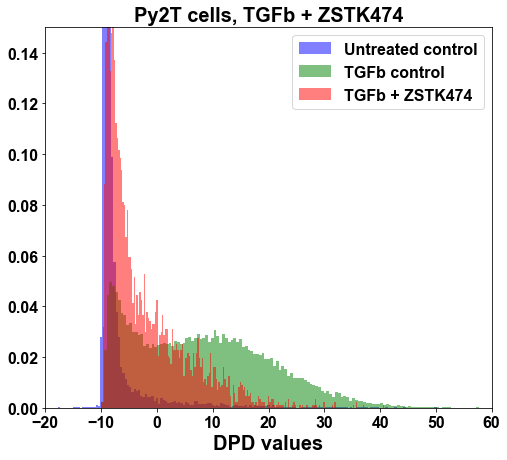

In [16]:
fig = plt.figure(figsize=(8,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)


plt.hist(DPDs_EPI, bins=200,density=True,color='blue',label='Untreated control',alpha=0.5)
plt.hist(DPDs_MES, bins=200,density=True,color='green',label='TGFb control',alpha=0.5)
plt.hist(DPDs_drug, bins=200,density=True,color='red',label='TGFb + ' + drug_name,alpha=0.5) 

plt.title('Py2T cells, TGFb + ' + drug_name,**fontTitle)
plt.xlim(-20,60)
plt.ylim(0,0.15)
plt.legend()
plt.xlabel('DPD values',**fontLabel)

plt.show()

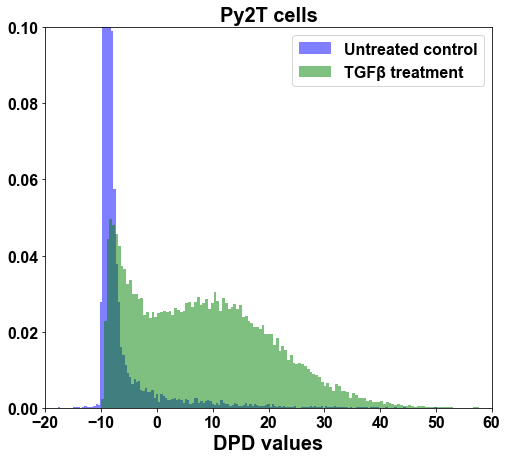

In [20]:
fig = plt.figure(figsize=(8,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)


plt.hist(DPDs_EPI, bins=200,density=True,color='blue',label='Untreated control',alpha=0.5)
plt.hist(DPDs_MES, bins=200,density=True,color='green',label='TGFβ treatment',alpha=0.5)

plt.title('Py2T cells',**fontTitle)
plt.xlim(-20,60)
plt.ylim(0,0.1)
plt.legend()
plt.xlabel('DPD values',**fontLabel)

plt.show()

In [228]:
# looking at single-cell distribution for specific AB
location_regex = re.compile(r'([A-Z]) / ([A-Z]\d+)')
well_regex = re.compile(r'([A-Z]\d+)\.fcs')

drug_name = 'Torin 1'
AB_name='pSmad23'
channel_name = Channels.loc[Channels['Channel Name'] == AB_name]['Channel Short Name']

ABs_EPI=[]
ABs_MES=[]
ABs_drug=[]

srch = location_regex.search(drugs.loc[drug_name,'Plate / Well'])
if srch:
    if (srch.group(1) == "A"):
        # processing 1 replicate for A
        print('Batch A')
        ABs_EPI = controls_EPI_FC_sc_A[channel_name]
        ABs_MES = controls_MES_FC_sc_A[channel_name]
        for fcs_name in treatments_A:
            # extracting well number
            well_srch = well_regex.search(fcs_name)
            if not well_srch:
                print('Wrong file name format!')
            if (well_srch.group(1) == srch.group(2)):
                # we have found our file
                np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset A/'+fcs_name)
                df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels)
                df_FC = df_fcs.divide(controls_EPI_fcs_A.mean(axis=0))
                df_FC = df_FC[ABs['channel']]
                ABs_drug = df_FC[channel_name]
    if (srch.group(1) == "B"):
        # processing 1 replicate for B
        print('Batch B')
        ABs_EPI = controls_EPI_FC_sc_B[channel_name]
        ABs_MES = controls_MES_FC_sc_B[channel_name]
        for fcs_name in treatments_B:
            # extracting well number
            well_srch = well_regex.search(fcs_name)
            if not well_srch:
                print('Wrong file name format!')
            if (well_srch.group(1) == srch.group(2)):
                # we have found our file
                np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset B/'+fcs_name)
                df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels)
                df_FC = df_fcs.divide(controls_EPI_fcs_B.mean(axis=0))
                df_FC = df_FC[ABs['channel']]
                ABs_drug = df_FC[channel_name]
    if (srch.group(1) == "C"):
        # processing 1 replicate for C
        print('Batch C')
        ABs_EPI = controls_EPI_FC_sc_C[channel_name]
        ABs_MES = controls_MES_FC_sc_C[channel_name]
        for fcs_name in treatments_C:
            # extracting well number
            well_srch = well_regex.search(fcs_name)
            if not well_srch:
                print('Wrong file name format!')
            if (well_srch.group(1) == srch.group(2)):
                # we have found our file
                np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset C/'+fcs_name)
                df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels)
                df_FC = df_fcs.divide(controls_EPI_fcs_C.mean(axis=0))
                df_FC = df_FC[ABs['channel']]
                ABs_drug = df_FC[channel_name]
    if (srch.group(1) == "D"):
        # processing 1 replicate for D
        print('Batch D')
        ABs_EPI = controls_EPI_FC_sc_D[channel_name]
        ABs_MES = controls_MES_FC_sc_D[channel_name]
        for fcs_name in treatments_D:
            # extracting well number
            well_srch = well_regex.search(fcs_name)
            if not well_srch:
                print('Wrong file name format!')
            if (well_srch.group(1) == srch.group(2)):
                # we have found our file
                np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset D/'+fcs_name)
                df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels)
                df_FC = df_fcs.divide(controls_EPI_fcs_D.mean(axis=0))
                df_FC = df_FC[ABs['channel']]
                ABs_drug = df_FC[channel_name]
    if (srch.group(1) == "E"):
        # processing 1 replicate for E
        print('Batch E')
        ABs_EPI = controls_EPI_FC_sc_E1[channel_name]
        ABs_MES = controls_MES_FC_sc_E1[channel_name]
        for fcs_name in treatments_E1:
            # extracting well number
            well_srch = well_regex.search(fcs_name)
            if not well_srch:
                print('Wrong file name format!')
            if (well_srch.group(1) == srch.group(2)):
                # we have found our file
                np_fcs = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset E/'+fcs_name)
                df_fcs = pd.DataFrame(np_fcs,columns=np_fcs.channels)
                df_FC = df_fcs.divide(controls_EPI_fcs_E1.mean(axis=0))
                df_FC = df_FC[ABs['channel']]
                ABs_drug = df_FC[channel_name]


print('FC for '+ AB_name + ' for epithelial state = ' + str(ABs_EPI.mean(axis=0)[0]) + ' ± ' + str(ABs_EPI.sem(axis=0)[0]))
print('Number of data points is ' + str(len(ABs_EPI)))
print('FC for '+ AB_name + ' for TGFb control = ' + str(ABs_MES.mean(axis=0)[0]) + ' ± ' + str(ABs_MES.sem(axis=0)[0]))
print('Number of data points is ' + str(len(ABs_MES)))
print('FC for '+ AB_name + ' for ' + drug_name + ' = ' + str(ABs_drug.mean(axis=0)[0]) + ' ± ' + str(ABs_drug.sem(axis=0)[0]))
print('Number of data points is ' + str(len(ABs_drug)))

Batch D
FC for pSmad23 for epithelial state = 1.0023674 ± 0.007374854
Number of data points is 20884
FC for pSmad23 for TGFb control = 0.68791837 ± 0.003021834
Number of data points is 102626
FC for pSmad23 for Torin 1 = 0.35934943 ± 0.013920123
Number of data points is 726


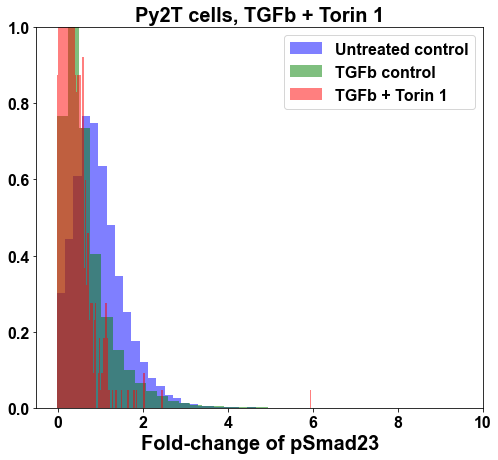

In [229]:
fig = plt.figure(figsize=(8,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

plt.hist(ABs_EPI.iloc[:,0], bins=200,density=True,color='blue',label='Untreated control',alpha=0.5)
plt.hist(ABs_MES.iloc[:,0], bins=200,density=True,color='green',label='TGFb control',alpha=0.5)
plt.hist(ABs_drug.iloc[:,0], bins=200,density=True,color='red',label='TGFb + ' + drug_name,alpha=0.5) 

plt.title('Py2T cells, TGFb + ' + drug_name,**fontTitle)
plt.xlim(-0.5,10)
plt.ylim(0,1)
plt.legend()
plt.xlabel('Fold-change of ' + AB_name,**fontLabel)

plt.show()

In [40]:
# using FlowCal to read files
#import FlowCal
#singlet_E7 = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset E/E1_5Days_TGFb_E7_Singlets_E7.fcs.fcs')
#singlet_E8 = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset E/E1_5Days_TGFb_E8_Singlets_E8.fcs.fcs')
#untreat_E2 = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset E/E1_5Days_Untreated_E2_Singlets_E2.fcs.fcs')
#untreat_E3 = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset E/E1_5Days_Untreated_E3_Singlets_E3.fcs.fcs')
control_fcs_no  = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset C/C3_5Days_Untreated_E2_Singlets_E2.fcs.fcs')
control_fcs_TGFb= FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset C/C3_5Days_TGFb_E7_Singlets_E7.fcs.fcs')
drug_fcs        = FlowCal.io.FCSData('./PhEMD-Multi-batch analyses-Inhibitor Dataset C/C3_5Days_TGFb_Cyt387_JAK12_C3_Singlets_C3.fcs.fcs')

#print(singlet_E7.shape)
print(control_fcs_no.channels)

('Time', 'Cell_length', '(Pd102)Di', '(Pd104)Di', '(Pd105)Di', '(Pd106)Di', '(Pd108)Di', '(Pd110)Di', '(In113)Di', '(In115)Di', '(I127)Di', '(La139)Di', '(Ce140)Di', '(Pr141)Di', '(Nd142)Di', '(Nd143)Di', '(Nd144)Di', '(Nd145)Di', '(Nd146)Di', '(Sm147)Di', '(Nd148)Di', '(Sm149)Di', '(Nd150)Di', '(Eu151)Di', '(Sm152)Di', '(Eu153)Di', '(Sm154)Di', '(Gd155)Di', '(Gd156)Di', '(Gd158)Di', '(Tb159)Di', '(Gd160)Di', '(Dy161)Di', '(Dy162)Di', '(Dy163)Di', '(Dy164)Di', '(Ho165)Di', '(Er166)Di', '(Er167)Di', '(Er168)Di', '(Tm169)Di', '(Er170)Di', '(Yb171)Di', '(Yb172)Di', '(Yb173)Di', '(Yb174)Di', '(Lu175)Di', '(Yb176)Di', '(Ir191)Di', '(Ir193)Di', '(Pt194)Di', '(Pt195)Di', 'FileNum', 'beadDist', 'barcode')


<IPython.core.display.Javascript object>


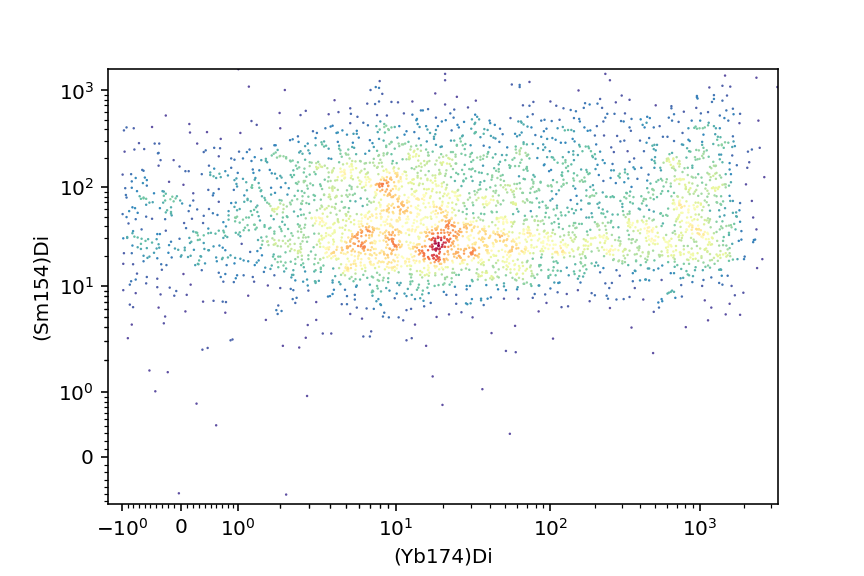

In [57]:
FlowCal.plot.density2d(control_fcs_no, channels=['(Yb174)Di', '(Sm154)Di'], mode='scatter')